In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

torch.manual_seed(777)    # reproducible

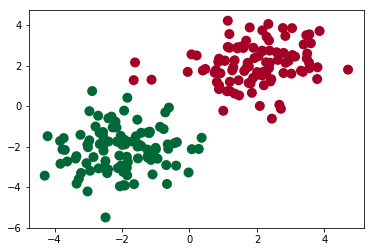

(Variable containing:
  3.4779  2.3469
  2.0850  0.0067
  1.5301  2.9320
  3.5445  2.1394
  2.3576  1.8775
  1.3001  1.9182
  1.0020 -0.2322
  0.9150  1.6184
  2.3846  2.1425
  0.4705  1.8312
  1.1825  2.8768
  3.1308  2.4415
  2.7907  2.6246
  2.2799  1.6698
  3.0407  3.8463
  3.4886  2.5898
  2.1524  2.7344
  2.3575  3.2384
 -1.1250  1.3017
  2.7692  3.8505
 -1.6134  2.1531
  1.1983  0.7431
  0.8101  1.1863
  1.4563  1.2723
  2.3380  4.0511
 -0.0519  1.6876
  2.7872  1.6307
  1.1970  1.2008
  2.2862  3.4176
  1.7562  1.1393
  1.1359  4.2124
  1.6817  3.2263
  0.7852  1.7747
  1.8938  2.8776
  1.1113  0.7343
  1.0403  2.2362
  2.2721  2.1593
  1.8507  0.6545
  1.1351  2.9164
  1.6229  1.7291
  3.3624  1.6871
  1.2673  1.7662
  2.6647  0.0632
  2.8421  3.4616
  2.8484  2.1350
  2.0717  1.5527
  1.5974  2.8668
  2.0972  1.6363
  2.1630  2.7086
  2.1624  1.5147
  0.3945  1.7541
  1.3375  0.6180
  3.0197  1.5979
  2.3986  1.2169
  1.4232  2.9003
  2.7103 -0.1337
  3.0472  2.4996
  2.3755 

In [4]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # shape (200, 1) FloatTensor = 32-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()
x,y

In [3]:
# Hypothesis using sigmoid and linear model
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid)

In [4]:
# Loss and Optimizer
optimizer = torch.optim.SGD(model.aparameters(), lr=0.01)

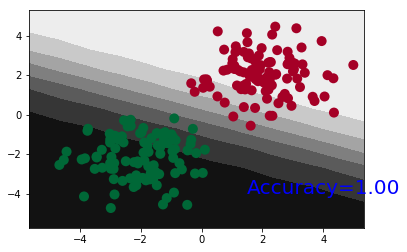

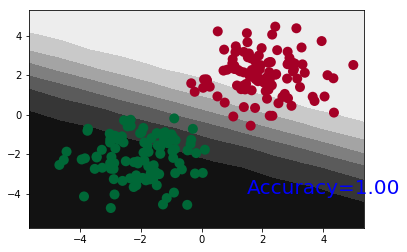

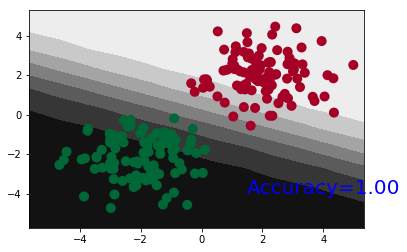

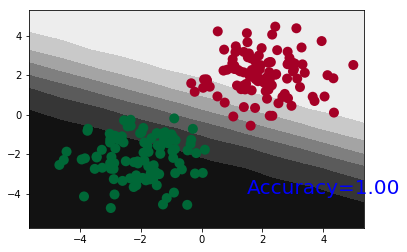

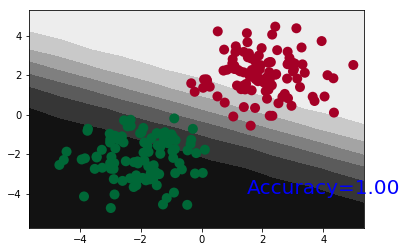

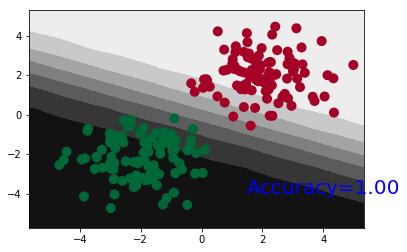

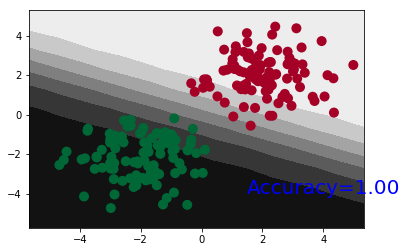

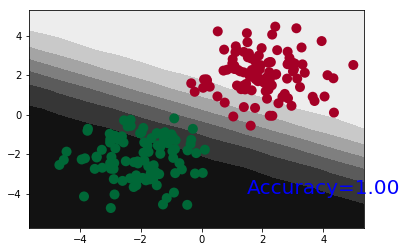

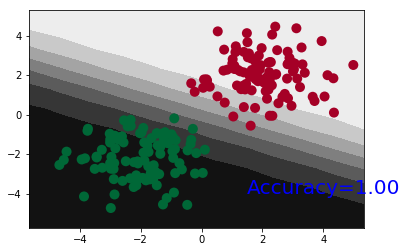

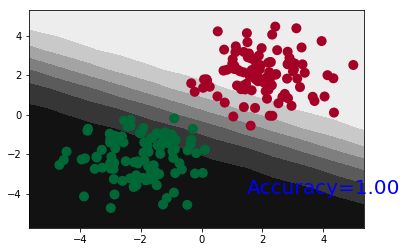

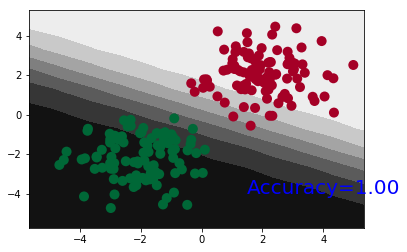

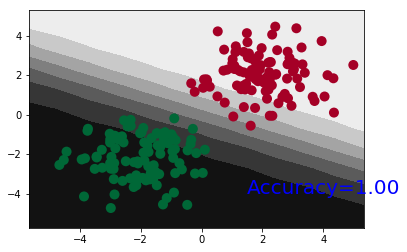

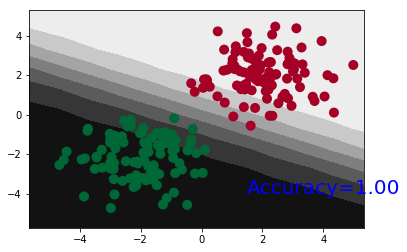

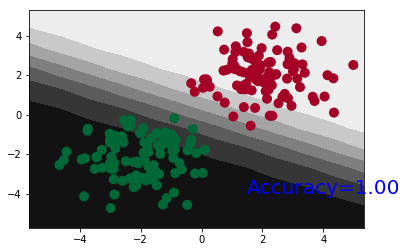

In [7]:
plt.ion()   # something about plotting

for t in range(120):
    
    prob = model(x)                 # input x and predict based on x
    cost = -(y * torch.log(prob) + (1 - y)* torch.log(1 - prob) ).mean() #Cross Entropy Cost
    
    optimizer.zero_grad()         # clear gradients for next train
    cost.backward()               # compute gradients
    optimizer.step()              # apply gradients
    
    
    # Ploting
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        prediction = prob.gt(0.5)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        
        # Draw massgrid
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                             np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))

        # here "model" is your model's prediction (classification) function
        Z = model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).float())

        # Put the result into a color plot
        Z = Z.view(xx.shape)
        plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.binary)
        #plt.axis('off')

        # Plot also the training points
        #plt.scatter(x[:, 0].data.numpy(), x[:, 1].data.numpy(), c=pred_y, cmap='RdYlGn')      
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')

        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'Blue'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()